In [1]:
import os 
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'cnn-time-stack.ipynb',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'feature select.ipynb',
 'LSTM.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'README.md',
 'second_model.ipynb',
 'tag盤點表.xlsx',
 'target.jpg',
 'train.csv',
 'train_FeatureSelected.csv',
 'xgboost.ipynb',
 '南亞PA廠資料分析_R6_1219.ipynb']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [3]:
df = pd.read_csv('train.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(193825, 93)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
2016-05-09 00:00:00,400.0,401.957120,400.751866,402.250788,401.148767,401.0,400.050078,403.0,402.0,401.0,...,0.0,1.0,4.051145,4.045683,6.484770,0.0,0.0,-1.000000,1.635186,0.051
2016-05-09 00:10:00,400.0,401.942713,400.949883,402.249145,401.000000,401.0,400.249800,403.0,402.0,401.0,...,0.0,2.0,4.157856,4.152250,6.449888,0.0,0.0,-1.000000,1.625011,0.051
2016-05-09 00:20:00,400.0,401.900145,400.899767,402.101255,401.000000,401.0,400.100155,403.0,402.0,401.0,...,0.0,3.0,4.208122,4.202449,6.440502,0.0,0.0,-0.898558,1.649780,0.051
2016-05-09 00:30:00,400.0,401.949936,400.900210,402.300333,401.000000,401.0,400.144695,403.0,402.0,401.0,...,0.0,4.0,4.152321,4.146723,6.463649,0.0,0.0,-0.509010,1.635187,0.051
2016-05-09 00:40:00,400.0,402.000000,400.850037,402.176070,401.000000,401.0,400.405002,403.0,402.0,401.0,...,0.0,5.0,4.016713,4.011298,6.414799,0.0,0.0,-0.992771,1.654259,0.051


# X為觸媒溫度

In [4]:
ch_map = pd.read_excel('tag盤點表.xlsx')[['TAG','chinese']].dropna()
x_col = ch_map[ch_map['chinese'].str.contains('觸媒溫度')]['TAG'].values.tolist()
# show
print(len(x_col))
ch_map[ch_map['TAG'].isin(x_col)]

12


,TAG,chinese
13,MLPAP_TI-0706A01,反應槽觸媒溫度(CL1)_高度(1900)
14,MLPAP_TI-0706A02,反應槽觸媒溫度_高度(1010)
15,MLPAP_TI-0706B01,反應槽觸媒溫度_高度(2865)
16,MLPAP_TI-0706C01,反應槽觸媒溫度_高度(400)
17,MLPAP_TI-0706D01,反應槽觸媒溫度_高度(2230)
18,MLPAP_TI-0706E01,反應槽觸媒溫度(CL1)_高度(1310)
19,MLPAP_TI-0716A01,反應槽觸媒溫度(CL1)_高度(1160)
20,MLPAP_TI-0716B01,反應槽觸媒溫度_高度(700)
21,MLPAP_TI-0716C01,反應槽觸媒溫度_高度(2715)
22,MLPAP_TI-0716D01,反應槽觸媒溫度_高度(1650)


# define target

In [5]:
df['target'] = df['MLPAP_FQ-0619.PV']/df['MLPAP_FQI-0997.PV']
df = df.drop(['MLPAP_FQ-0619.PV','MLPAP_FQI-0997.PV'],axis=1)

count    148472.000
mean            inf
std             NaN
min           0.000
25%           0.899
50%           0.908
75%           0.917
max             inf
Name: target, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x205c8b8fc88>,
 'caps': [<matplotlib.lines.Line2D at 0x205d4242648>,
 'boxes': [<matplotlib.lines.Line2D at 0x205c8b8ffc8>],
 'medians': [<matplotlib.lines.Line2D at 0x205d4237508>],
 'fliers': [<matplotlib.lines.Line2D at 0x205d4237e08>],
 'means': []}

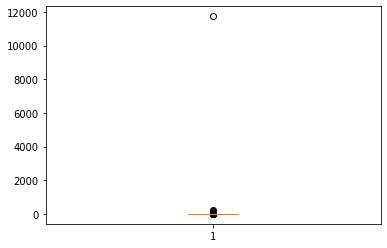

In [6]:
print(df['target'].describe().apply(lambda x:round(x,3)))
plt.boxplot(df['target'].dropna())

In [7]:
# IQR Filter
Q3 = df['target'].quantile(0.75)
Q1 = df['target'].quantile(0.25)
IQR = Q3 - Q1
C = (df['target']<Q1-1.5*IQR)|(df['target']>Q3+1.5*IQR)
out_idx = df.loc[C].index.tolist()
df = df.drop(out_idx)

count    136416.000000
mean          0.907720
std           0.012387
min           0.872412
25%           0.899622
50%           0.907436
75%           0.915682
max           0.943926
Name: target, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x205c8ab1c88>,
 'caps': [<matplotlib.lines.Line2D at 0x205c8ab1e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x205c8ab13c8>],
 'medians': [<matplotlib.lines.Line2D at 0x205c8a6be08>],
 'fliers': [<matplotlib.lines.Line2D at 0x205c8a6be88>],
 'means': []}

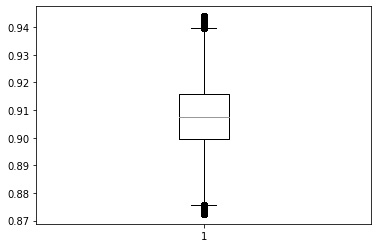

In [8]:
print(df['target'].describe())
plt.boxplot(df['target'].dropna())

In [9]:
# Quantile Filter
ub = df['target'].quantile(0.95)
lb = df['target'].quantile(0.05)
C = (df['target']<lb)|(df['target']>ub)
out_idx = df.loc[C].index.tolist()
df = df.drop(out_idx)

count    122774.000000
mean          0.907689
std           0.009630
min           0.887309
25%           0.900449
50%           0.907436
75%           0.914657
max           0.928837
Name: target, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x205c8815708>,
 'caps': [<matplotlib.lines.Line2D at 0x205c8815fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x205c8810c08>],
 'medians': [<matplotlib.lines.Line2D at 0x205c8819f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x205c881edc8>],
 'means': []}

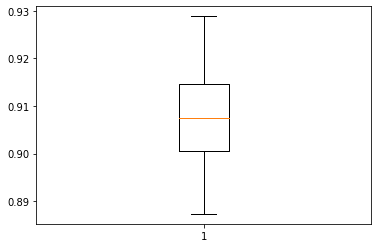

In [10]:
print(df['target'].describe())
plt.boxplot(df['target'].dropna())

In [11]:
# dropna
print(df.shape)
df = df.dropna(subset=['target'])
print(df.shape)

(168127, 92)
(122774, 92)


# scaler features

In [12]:
from sklearn.preprocessing import MinMaxScaler
import warnings;warnings.simplefilter('ignore')

df = df[x_col+['target']]
sc = MinMaxScaler()

df[x_col] = sc.fit_transform(df[x_col])

print(df.shape)
df.head()

(122774, 13)


,MLPAP_TI-0706A01,MLPAP_TI-0706A02,MLPAP_TI-0706B01,MLPAP_TI-0706C01,MLPAP_TI-0706D01,MLPAP_TI-0706E01,MLPAP_TI-0716A01,MLPAP_TI-0716B01,MLPAP_TI-0716C01,MLPAP_TI-0716D01,MLPAP_TI-0716D02,MLPAP_TI-0716E01,target
2016-05-10 08:10:00,0.936486,0.974415,1.000000,0.996411,0.781994,0.880138,0.951668,0.869932,0.998706,0.938620,1.000000,0.911645,0.914125
2016-05-10 08:20:00,0.936937,0.974415,1.000000,0.996906,0.781994,0.880138,0.951668,0.869932,0.999557,0.940045,1.000000,0.911278,0.919765
2016-05-10 08:30:00,0.936486,0.974415,1.000000,0.996353,0.781994,0.880138,0.951668,0.869932,1.000000,0.939362,1.000000,0.911278,0.926346
2016-05-10 23:40:00,0.909910,0.962582,0.988840,1.000000,0.766590,0.845891,0.945077,0.877158,0.964429,0.918448,0.978040,0.940974,0.906781
2016-05-10 23:50:00,0.909459,0.963541,0.989358,1.000000,0.766590,0.845891,0.945077,0.877158,0.966158,0.919960,0.978235,0.943907,0.926688


# corr

In [13]:
abs(df.corr()).style.background_gradient()

,MLPAP_TI-0706A01,MLPAP_TI-0706A02,MLPAP_TI-0706B01,MLPAP_TI-0706C01,MLPAP_TI-0706D01,MLPAP_TI-0706E01,MLPAP_TI-0716A01,MLPAP_TI-0716B01,MLPAP_TI-0716C01,MLPAP_TI-0716D01,MLPAP_TI-0716D02,MLPAP_TI-0716E01,target
MLPAP_TI-0706A01,1,0.333782,0.461984,0.215997,0.953329,0.0884936,0.317721,0.351038,0.771166,0.26696,0.875154,0.270027,0.340057
MLPAP_TI-0706A02,0.333782,1,0.105399,0.0559471,0.184227,0.161722,0.998994,0.0685845,0.0371673,0.267872,0.0422688,0.0465315,0.14714
MLPAP_TI-0706B01,0.461984,0.105399,1,0.0681104,0.478178,0.195749,0.111933,0.196342,0.591038,0.12682,0.609578,0.208232,0.264896
MLPAP_TI-0706C01,0.215997,0.0559471,0.0681104,1,0.201022,0.237276,0.0618838,0.140507,0.1959,0.12696,0.192341,0.176865,0.0731644
MLPAP_TI-0706D01,0.953329,0.184227,0.478178,0.201022,1,0.0117618,0.168418,0.37159,0.802177,0.182362,0.926033,0.29521,0.276521
MLPAP_TI-0706E01,0.0884936,0.161722,0.195749,0.237276,0.0117618,1,0.136387,0.61682,0.320171,0.942887,0.189259,0.680484,0.0713476
MLPAP_TI-0716A01,0.317721,0.998994,0.111933,0.0618838,0.168418,0.136387,1,0.0332964,0.0394991,0.239096,0.033446,0.0142189,0.146398
MLPAP_TI-0716B01,0.351038,0.0685845,0.196342,0.140507,0.37159,0.61682,0.0332964,1,0.0189229,0.694448,0.183024,0.963366,0.0534153
MLPAP_TI-0716C01,0.771166,0.0371673,0.591038,0.1959,0.802177,0.320171,0.0394991,0.0189229,1,0.244252,0.959493,0.0807913,0.332533
MLPAP_TI-0716D01,0.26696,0.267872,0.12682,0.12696,0.182362,0.942887,0.239096,0.694448,0.244252,1,0.0632357,0.723955,0.0332281


# split

In [14]:
from sklearn.model_selection import train_test_split

X = df[x_col]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(98219, 12) (98219,)
(24555, 12) (24555,)


# fit

In [15]:
from xgboost import XGBRegressor

model = XGBRegressor(objective="reg:squarederror")
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred,name='y_pred',index=y_test.index)

print(r2_score(y_test,y_pred))
print(round(mean_squared_error(y_test,y_pred),4))

0.34707442152032053
0.0001


In [17]:
chmap = pd.read_excel('tag盤點表.xlsx')[['TAG','chinese']]
chmap = dict(zip(chmap['TAG'],chmap['chinese']))

In [18]:
FIMP = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['imp'])
FIMP['中文'] = FIMP.index.map(chmap)
FIMP = FIMP.sort_values(by='imp',ascending=False)
FIMP[['中文','imp']].head(10).style.background_gradient()

,中文,imp
MLPAP_TI-0706A01,反應槽觸媒溫度(CL1)_高度(1900),0.351848
MLPAP_TI-0716D02,反應槽觸媒溫度(CL2)_高度(2380),0.121539
MLPAP_TI-0706B01,反應槽觸媒溫度_高度(2865),0.0911963
MLPAP_TI-0716B01,反應槽觸媒溫度_高度(700),0.0654119
MLPAP_TI-0716D01,反應槽觸媒溫度_高度(1650),0.0580976
MLPAP_TI-0706E01,反應槽觸媒溫度(CL1)_高度(1310),0.0563181
MLPAP_TI-0706D01,反應槽觸媒溫度_高度(2230),0.0556849
MLPAP_TI-0716C01,反應槽觸媒溫度_高度(2715),0.0454781
MLPAP_TI-0716A01,反應槽觸媒溫度(CL1)_高度(1160),0.0447004
MLPAP_TI-0716E01,反應槽觸媒溫度(CL0)_高度(550),0.0417473


In [19]:
y_test = y_test.sort_index()
y_pred = y_pred.sort_index()

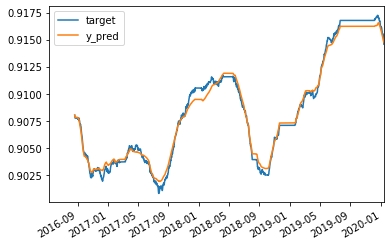

In [20]:
y_test.rolling(6*24*15).mean().plot()
y_pred.rolling(6*24*15).mean().plot()
plt.legend()